***Furkan Öztürk***

***150200312***

In [9]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

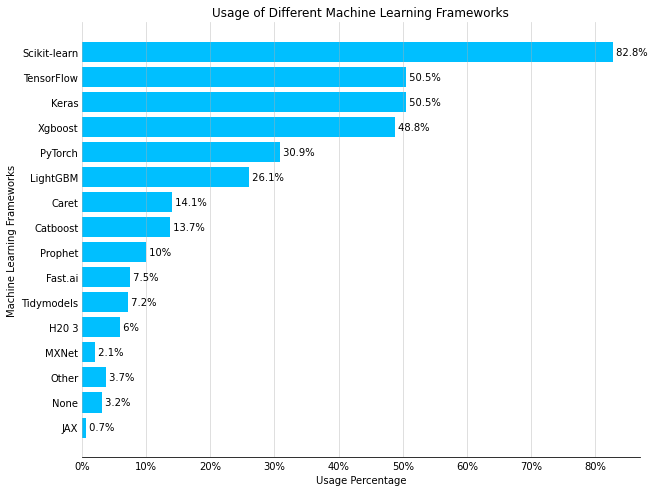

In [18]:
def problem1(percentages , frameworks):
    
    plt.figure(figsize=(10, 8))
    bars = plt.barh(frameworks, percentages, color='deepskyblue')
    plt.xlabel('Usage Percentage')
    plt.ylabel('Machine Learning Frameworks')
    plt.title('Usage of Different Machine Learning Frameworks')

    # Loop over the bars and place a label with the percentage for each bar
    for bar, percentage in zip(bars, percentages):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {percentage}%', va='center')

    # Remove all the spines except the bottom one
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)

    # Add a vertical grid
    plt.grid(axis='x', alpha=0.5)

    # Change x-axis format
    formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x)}%')
    plt.gca().xaxis.set_major_formatter(formatter)

    plt.gca().invert_yaxis()  # invert the y-axis to have the highest percentage at the top

    plt.tick_params(axis='x', which='both', length=0)  # remove the tick marks
    plt.tick_params(axis='y', which='both', length=0)  # remove the tick marks


    plt.show()


percentages = [82.8,50.5,50.5,48.8,30.9,26.1,14.1,13.7,10,7.5,7.2,6,2.1,3.7,3.2,0.7]
frameworks = ["Scikit-learn","TensorFlow","Keras","Xgboost","PyTorch",
"LightGBM","Caret","Catboost","Prophet","Fast.ai","Tidymodels","H20 3","MXNet","Other","None","JAX"]

problem1(percentages, frameworks)

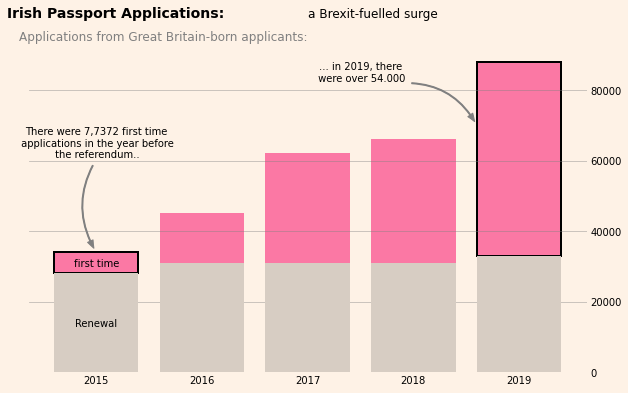

In [19]:
def problem2(file_path):
    # Read the data from the Excel file
    df = pd.read_excel(file_path)

    plt.figure(facecolor='#FEF2E6', figsize=(10, 6))  # Adjust the figure size and color
    plt.gca().set_facecolor('#FEF2E6')

    # Add grid lines with a lower zorder
    plt.grid(axis='y', linestyle='-', color='grey', zorder=0, alpha=0.5)

    # Create the stacked bar chart with a higher zorder
    bars1 = plt.bar(df['Year'], df['Renewal'], color='#D7CDC3', label='First Time', zorder=3)
    
    # Create the stacked bar chart
    for i, year in enumerate(df['Year']):
        if i == 0:  # This is the first bar
            plt.bar(year, df['FirstTime'].iloc[i], bottom=df['Renewal'].iloc[i], color='#FB78A4', edgecolor='black', linewidth=2, label='Renewal' if i == 0 else "")
            plt.hlines(df['Renewal'].iloc[i] + df['FirstTime'].iloc[i], year-0.4, year+0.4, colors='black', linewidth=2)  # Draw a line at the bottom of the first pink bar
            plt.text(year, df['Renewal'].iloc[i]/2, 'Renewal', ha='center', va='center', color='black')  # Add label to the first bar
            plt.text(year, df['Renewal'].iloc[i] + df['FirstTime'].iloc[i]/2, 'first time', ha='center', va='center', color='black')  # Add label to the first bar
            plt.annotate('There were 7,7372 first time\n applications in the year before\n the referendum..',
                         ha='center', va='center',
                           xy=(year, df['Renewal'].iloc[i] + df['FirstTime'].iloc[i]), xytext=(2015, 65000), arrowprops=dict(facecolor='grey', shrink=0.05, edgecolor='grey', width=1, headwidth=6, headlength=8,connectionstyle="arc3,rad=.3"))
        elif i == 4:  # This is the last bar
            plt.bar(year, df['FirstTime'].iloc[i], bottom=df['Renewal'].iloc[i], color='#FB78A4', edgecolor='black', linewidth=2)
            plt.annotate('... in 2019, there\n were over 54.000', 
                        xy=(year-0.4, 70000), 
                        xytext=(2017.5, 85000), 
                        arrowprops=dict(facecolor='grey', shrink=0.05, edgecolor='grey', width=1, headwidth=6, headlength=8, connectionstyle="arc3,rad=-.3"),
                        ha='center', va='center')
        else:    
            
            plt.bar(year, df['FirstTime'].iloc[i], bottom=df['Renewal'].iloc[i], color='#FB78A4', label='Renewal' if i == 0 else "")

    plt.tick_params(axis='y',labelright = True, labelleft = False, left=False)

    # Remove frame
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    
    # Add title and text
    plt.text(0.36, 1.10, 'Irish Passport Applications: ', horizontalalignment='right', verticalalignment='center', transform=plt.gca().transAxes, fontsize=14, weight='bold')
    plt.text(0.5, 1.10, 'a Brexit-fuelled surge', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

    plt.title('Applications from Great Britain-born applicants:', color='grey', ha='right')
    plt.tick_params(axis='x', which='both', length=0)  # remove the tick marks
    plt.tick_params(axis='y', which='both', length=0)  # remove the tick marks

    
    plt.show()

problem2("iris_pasaport_applications.xlsx")

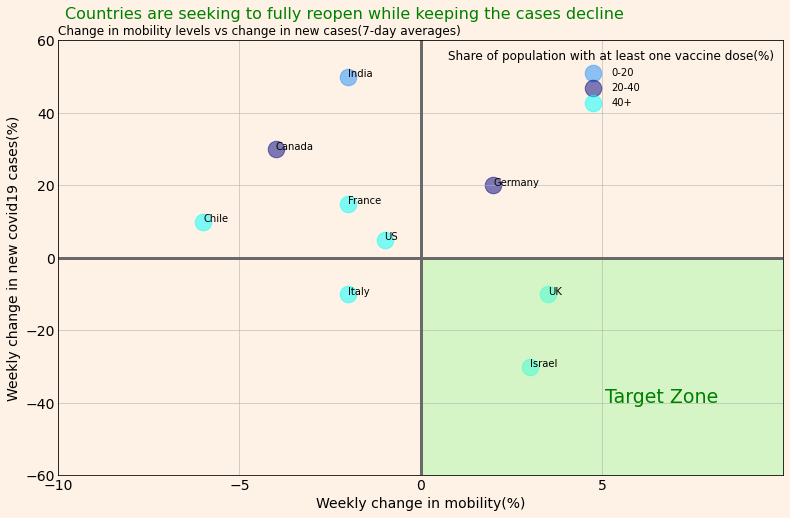

In [24]:
def problem3(country_index, mobility, case, colorlist):
    
    # Create a new list for color labels based on the values in `case`
    color_labels = []
    for c in case:
        if c < 20:
            color_labels.append('cyan')
        elif c < 40:
            color_labels.append('navy')
        else:
            color_labels.append('dodgerblue')

    fig = plt.figure(facecolor='#FEF2E6' , figsize=(13, 8))
    ax = fig.add_subplot(111) 
    ax.set_facecolor('#FEF2E6')

    # Create a scatter plot for each color label
    for color in set(color_labels):
        indices = [i for i, x in enumerate(color_labels) if x == color]
        ax.scatter([mobility[i] for i in indices], [case[i] for i in indices], color=color, s = 275, alpha=0.5, label=color)

    # Add country names as labels
    for i in range(len(country_index)):
        ax.text(mobility[i], case[i], country_index[i])

    ax.set_xlabel('Weekly change in mobility(%)',fontsize=14)
    ax.set_ylabel('Weekly change in new covid19 cases(%)',fontsize=14)
    ax.set_title('Change in mobility levels vs change in new cases(7-day averages)', 
                 fontsize=12, loc='left')
    ax.text(0.01, 1.05, 'Countries are seeking to fully reopen while keeping the cases decline', transform=ax.transAxes, fontsize=16, color = 'green', ha='left')

    ax.set_xticks(np.arange(-10, 10, 5))
    ax.grid(axis='both', alpha=0.7)

    # Set the limits of the x and y axis
    ax.set_xlim(-10, 10)
    ax.set_ylim(-60, 60)

    # Add x and y axes from the origin point
    ax.axhline(0, color='dimgray',linewidth=3)
    ax.axvline(0, color='dimgray',linewidth=3)

    # Mark the bottom right part of the axis as target zone and color it green
    ax.fill_between([0, 10], [-60, -60], [0, 0], color='palegreen', alpha=0.4)

    # Add label for the target zone
    ax.text(8.2, -40, 'Target Zone', fontsize=19, ha='right', color='green')

    # Add a legend
    ax.legend(loc='upper right', title='Share of population with at least one vaccine dose(%)', title_fontsize='12', labels=['0-20', '20-40', '40+'], frameon=False)

    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.tick_params(axis='x', which='both', length=0)  # remove the tick marks
    plt.tick_params(axis='y', which='both', length=0)  # remove the tick marks


    plt.show()

country_index = ["Chile","India","Canada","France","Italy","US","UK","Israel","Germany"]
mobility = [-6,-2,-4,-2,-2,-1,3.5,3,2]
case = [10,50,30,15,-10,5,-10,-30,20]
colorlist = ["navy","cyan","dodgerblue","cyan","cyan","dodgerblue","navy","navy","cyan"]

problem3(country_index, mobility, case, colorlist)